Resources:

https://iamrajatroy.medium.com/document-intelligence-series-part-1-table-detection-with-yolo-1fa0a198fd7

https://huggingface.co/foduucom/table-detection-and-extraction


In [ ]:
!pip install ultralyticsplus==0.0.28 ultralytics==8.0.43 pdf2image matplotlib
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (910 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from ultralyticsplus import YOLO, render_result
from PIL import Image
from pdf2image import convert_from_path


In [ ]:
from google.colab import files

# Upload a PDF file
uploaded = files.upload()

# Assuming a single PDF file is uploaded, get its filename
pdf_file = next(iter(uploaded.keys()))

# Convert the PDF to images
pages = convert_from_path(pdf_file, dpi=300)

# Select the first page as an image
img = pages[0]
img.show()  # Display the image


Saving Table_18 (1).pdf to Table_18 (1).pdf


In [ ]:
# load model
model = YOLO('keremberke/yolov8m-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

0: 640x480 1 bordered, 1177.0ms
Speed: 1.0ms preprocess, 1177.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Boxes:  tensor([[ 63.00000,  63.00000, 430.00000, 246.00000,   0.85458,   0.00000]])


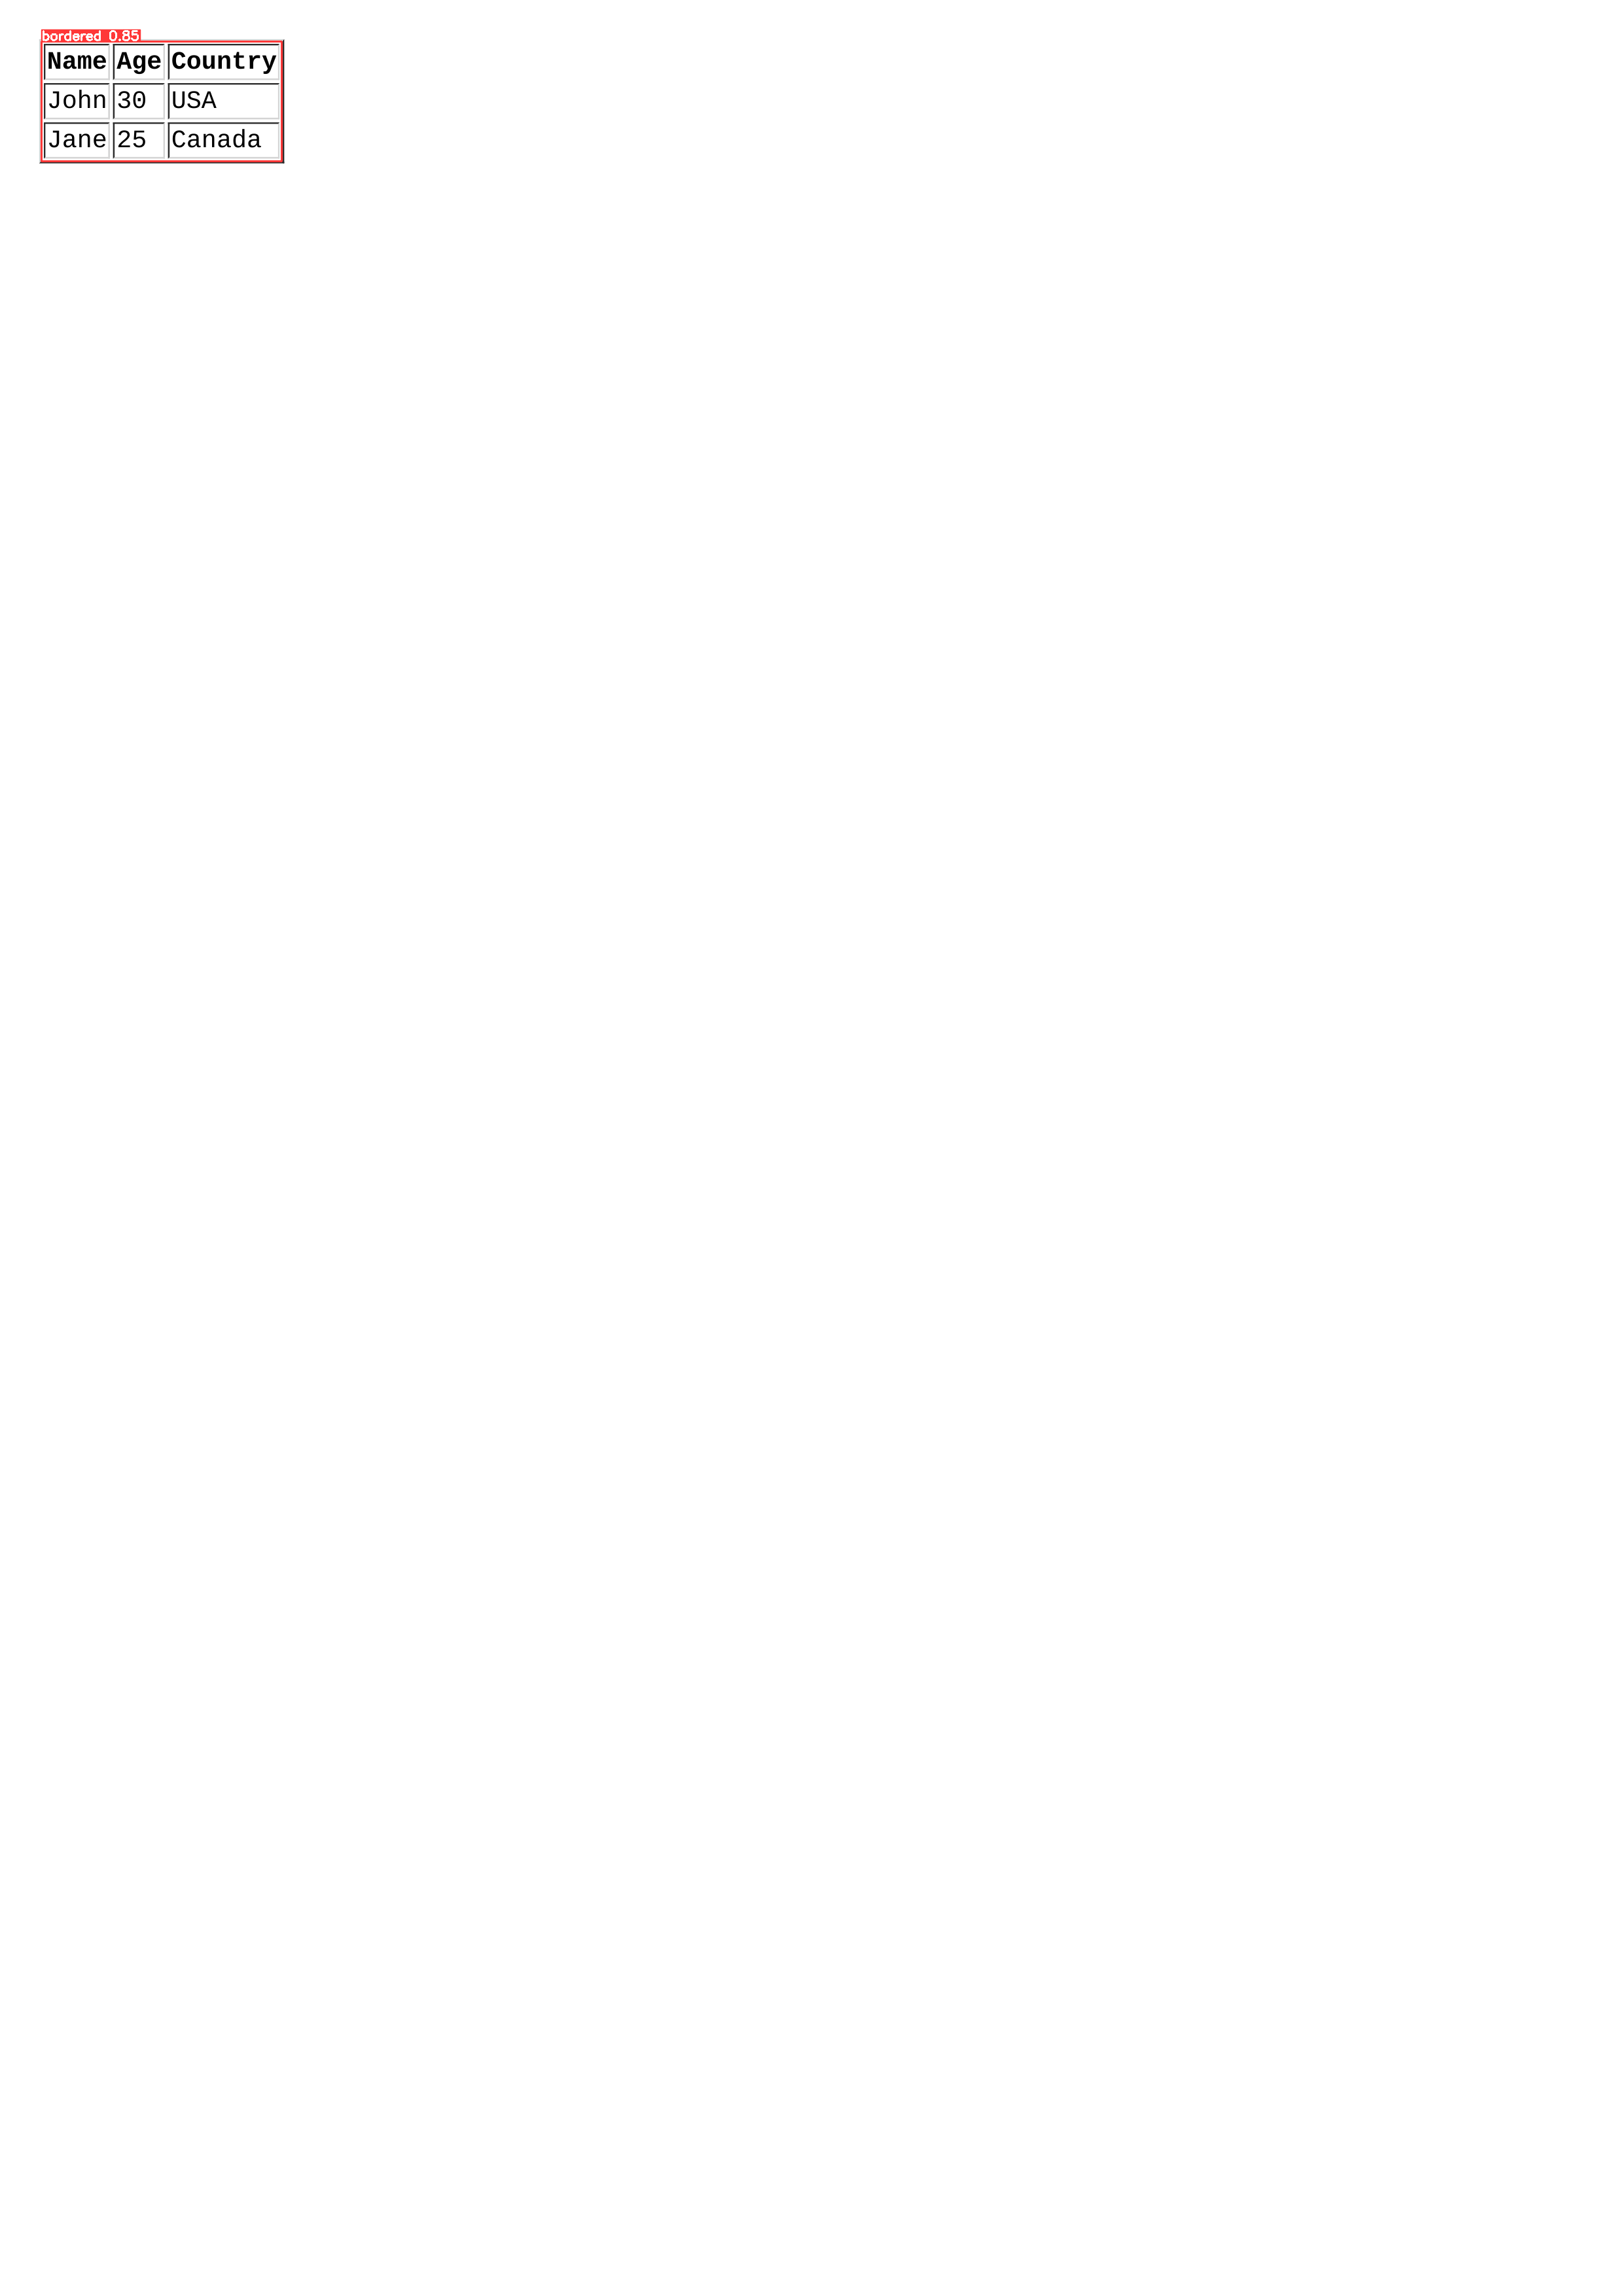

In [ ]:
# perform inference
results = model.predict(img)

# observe results
print('Boxes: ', results[0].boxes)
render = render_result(model=model, image=img, result=results[0])
render